# Script to do plots for Part 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import matplotlib
import scienceplots
matplotlib.rcParams.update(matplotlib.rcParamsDefault) # TO RESET  PLOTS
plt.style.use(['science'])
# Set global font properties
plt.rcParams['legend.frameon'] = True  # Enable the legend frame
plt.rcParams['legend.fancybox'] = False  # No fancybox, just a regular box
plt.rcParams['legend.edgecolor'] = 'black'  # Black edge color
plt.rcParams['legend.framealpha'] = 1  # No transparency
plt.rcParams['font.size'] = 12
plt.rcParams['font.weight'] = 'normal'

# Plot power and thrust coefficients against TSR

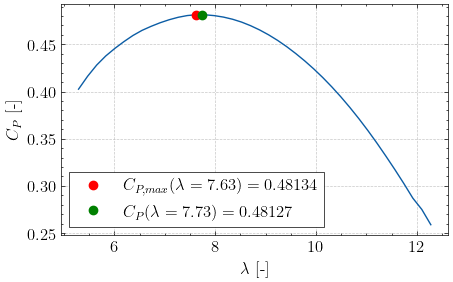

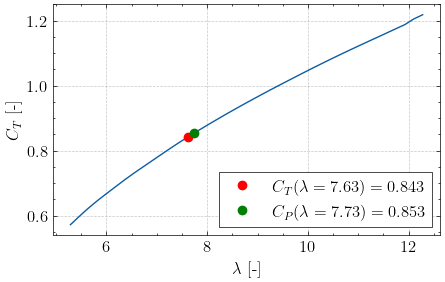

In [2]:
R = 91.665              # SPYROS: MINE
TSR_CHOICE = 7.73        # SPYROS: Maybe operate aboe CP_max

# Load the data using np.loadtxt
# Adjust the delimiter and number of columns if needed
data = np.loadtxt('../our_design/res_hawc2s/Spyros_WT_hawc2s_multitsr.pwr', skiprows=1)

# Extract relevant columns
wind_speed = data[:, 0]  # V [m/s]
rpm = data[:, 9]         # Speed [rpm]
Cp = data[:, 3]          # Cp [-]
Ct = data[:, 4]          # Ct [-]
pitch = data[:,8]        # pitch [deg]

# Calculate omega (rad/s) and TSR
omega = np.pi * rpm / 30
TSR = (omega * R) / wind_speed

# Find the max Cp and its corresponding TSR
cp_max_index = np.argmax(Cp)
cp_max_value = Cp[cp_max_index]
cp_max_tsr = TSR[cp_max_index]
ct_value = Ct[cp_max_index]

# Define the function to get Cp and Ct for a given TSR
cp_interp = interp1d(TSR, Cp, kind='linear', fill_value="extrapolate")
ct_interp = interp1d(TSR, Ct, kind='linear', fill_value="extrapolate")
def get_cp_ct(tsr_value):
    cp_value = cp_interp(tsr_value)  # Interpolated Cp
    ct_value = ct_interp(tsr_value)  # Interpolated Ct
    return cp_value, ct_value
cp_choise, ct_choise = get_cp_ct(TSR_CHOICE)

# Plot Cp vs TSR
plt.figure(figsize=(5, 3))
plt.plot(TSR, Cp)
plt.plot(cp_max_tsr, cp_max_value, 'ro', label=rf'$C_{{P,max}}(\lambda={cp_max_tsr:.2f})={cp_max_value:.5f}$')
plt.plot(TSR_CHOICE, cp_choise, 'go', label=rf'$C_{{P}}(\lambda={TSR_CHOICE:.2f})={cp_choise:.5f}$')
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_P$ [-]')
plt.legend(fancybox=False, edgecolor="black", loc='lower left').get_frame().set_linewidth(0.5)
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/HAWC2S_CP_TSR' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Ct vs TSR
plt.figure(figsize=(5,3))
plt.plot(TSR, Ct)
plt.plot(cp_max_tsr, ct_value, 'ro', label=rf'$C_{{T}}(\lambda={cp_max_tsr:.2f})={ct_value:.3f}$')
plt.plot(TSR_CHOICE, ct_choise, 'go', label=rf'$C_{{P}}(\lambda={TSR_CHOICE:.2f})={ct_choise:.3f}$')
plt.xlabel(r'$\lambda$ [-]')
plt.ylabel(r'$C_T$ [-]')
plt.legend(fancybox=False, edgecolor="black", loc='lower right').get_frame().set_linewidth(0.5)
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/HAWC2S_CT_TSR' + '.pdf', dpi=300, bbox_inches='tight')

# [!] I think we need to have have generated "compute_flex_opt" before continuing below

# Rotor speed and pitch angle vs wind speed

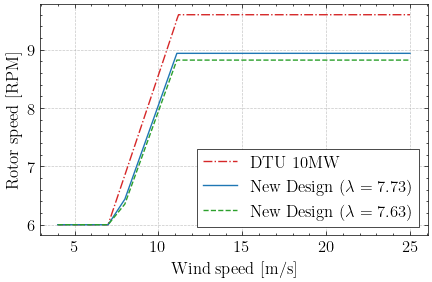

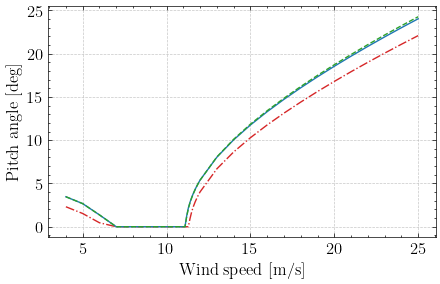

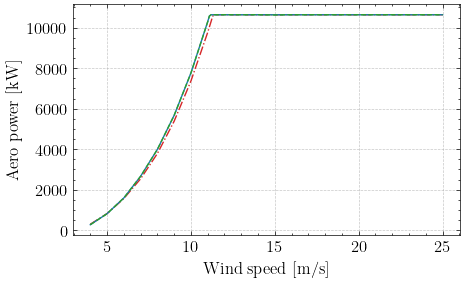

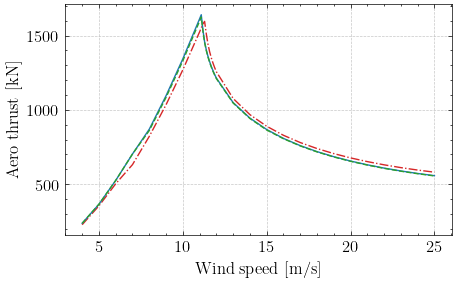

In [4]:
import pandas as pd


# wind speed [m/s]
# pitch [deg]
# rot. speed [rpm]
# aero power [kw]
# aero thrust [kn]


# Define column names
column_names = ['wsp', 'pitch', 'omega', 'power', 'thrust']

# Read the data while skipping the first row (header)
data_DTU = pd.read_csv('../dtu_10mw/data/dtu_10mw_flex_minrotspd.opt', 
                       skiprows=1,  # Skip the first row with the count
                       delim_whitespace=True,  # Handle whitespace as delimiter
                       names=column_names)  # Assign new column names

data_SPY = pd.read_csv('../our_design/res_hawc2s/Spyros_WT_compute_flex_opt.opt', 
                       skiprows=1, 
                       delim_whitespace=True, 
                       names=column_names)

# I DONT HAVE GROUP DATA
data_GRP = pd.read_csv('../our_design/res_hawc2s/Group_flex.opt', 
                       skiprows=1, 
                       delim_whitespace=True, 
                       names=column_names)

data_SPY_763 = pd.read_csv('../our_design/res_hawc2s/Spyros_WT_compute_flex_opt_TSR_7.63.opt', 
                       skiprows=1, 
                       delim_whitespace=True, 
                       names=column_names)

# Plot omega vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(data_DTU['wsp'], data_DTU['omega'], '-.', c='tab:red', label="DTU 10MW")
plt.plot(data_SPY['wsp'], data_SPY['omega'], '-', c='tab:blue', label=r"New Design ($\lambda=7.73$)")
plt.plot(data_SPY_763['wsp'], data_SPY_763['omega'], '--', c='tab:green', label=r"New Design ($\lambda=7.63$)")
# plt.plot(data_GRP['wsp'], data_GRP['omega'], '--', c='tab:green', label="Group Design")
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Rotor speed [RPM]')
plt.legend(fancybox=False, edgecolor="black", loc='lower right').get_frame().set_linewidth(0.5)
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/flex_oper_omega' + '.pdf', dpi=300, bbox_inches='tight')

# Plot pitch vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(data_DTU['wsp'], data_DTU['pitch'], '-.', c='tab:red')
plt.plot(data_SPY['wsp'], data_SPY['pitch'], '-', c='tab:blue')
plt.plot(data_SPY_763['wsp'], data_SPY_763['pitch'], '--', c='tab:green')
# plt.plot(data_GRP['wsp'], data_GRP['pitch'], '--', c='tab:green')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Pitch angle [deg]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/flex_oper_pitch' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Aero Power vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(data_DTU['wsp'], data_DTU['power'], '-.', c='tab:red')
plt.plot(data_SPY['wsp'], data_SPY['power'], '-', c='tab:blue')
plt.plot(data_SPY_763['wsp'], data_SPY_763['power'], '--', c='tab:green')
# plt.plot(data_GRP['wsp'], data_GRP['power'], '--', c='tab:green')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Aero power [kW]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/flex_oper_power' + '.pdf', dpi=300, bbox_inches='tight')

# Plot Aero Thrust vs wind speed
plt.figure(figsize=(5, 3))
plt.plot(data_DTU['wsp'], data_DTU['thrust'], '-.', c='tab:red')
plt.plot(data_SPY['wsp'], data_SPY['thrust'], '-', c='tab:blue')
plt.plot(data_SPY_763['wsp'], data_SPY_763['thrust'], '--', c='tab:green')
# plt.plot(data_GRP['wsp'], data_GRP['thrust'], '--', c='tab:green')
plt.xlabel('Wind speed [m/s]')
plt.ylabel('Aero thrust [kN]')
plt.tick_params(axis='both',bottom=True, top=True, left=True, right=True, direction='in', which='major')
plt.grid(linestyle='--', linewidth=0.5, alpha=0.7)
plt.savefig('plots/flex_oper_thrust' + '.pdf', dpi=300, bbox_inches='tight')


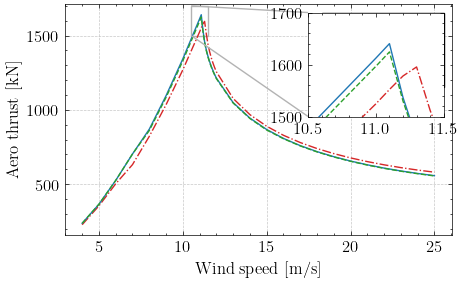

In [5]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset

# Main Plot: Aero Thrust vs Wind Speed
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(data_DTU['wsp'], data_DTU['thrust'], '-.', c='tab:red', label='DTU')
ax.plot(data_SPY['wsp'], data_SPY['thrust'], '-', c='tab:blue', label='SPY')
ax.plot(data_SPY_763['wsp'], data_SPY_763['thrust'], '--', c='tab:green', label='SPY 763')
# ax.plot(data_GRP['wsp'], data_GRP['thrust'], '--', c='tab:green', label='GRP')
ax.set_xlabel('Wind speed [m/s]')
ax.set_ylabel('Aero thrust [kN]')
ax.tick_params(axis='both', bottom=True, top=True, left=True, right=True, direction='in', which='major')
ax.grid(linestyle='--', linewidth=0.5, alpha=0.7)
ax.legend()

# Add a zoomed-in inset
axins = inset_axes(ax, width="35%", height="45%", loc='upper right')  # Adjust size and location
axins.plot(data_DTU['wsp'], data_DTU['thrust'], '-.', c='tab:red')
axins.plot(data_SPY['wsp'], data_SPY['thrust'], '-', c='tab:blue')
axins.plot(data_SPY_763['wsp'], data_SPY_763['thrust'], '--', c='tab:green')
# axins.plot(data_GRP['wsp'], data_GRP['thrust'], '--', c='tab:green')
axins.set_xlim(10.5, 11.5)  # Zoomed-in region
axins.set_ylim(1500, 1700)
# axins.tick_params(axis='both', direction='in', which='major')

# Mark the zoomed-in region on the main plot
mark_inset(ax, axins, loc1=2, loc2=3, fc="none", ec="0.7")

# Save the plot
plt.savefig('plots/flex_oper_thrust_zoomed.pdf', dpi=300, bbox_inches='tight')
plt.show()

# MAX_Genspeed should be connected to Operational Point

In [ ]:
# R = 91.665
# TSR = 7.05
# CP = 0.461

# V_rated = (2*10.64e6 /(CP * (R**2 * np.pi) * 1.225))**(1/3)
# omega_rated = TSR/R*V_rated * 60 / (2*np.pi)
# print(f'Single Point Design: Omega = {omega_rated:.2f} RPM')

In [ ]:
# R = 91.665
# TSR = 7.63
# CP = 0.48134

# V_rated = (2*10.64e6 /(CP * (R**2 * np.pi) * 1.225))**(1/3)
# omega_rated = TSR/R*V_rated * 60 / (2*np.pi)
# print(f'Using TSR=7.63: Omega = {omega_rated:.2f} RPM')

In [ ]:
# R = 91.665
# TSR = 7.73
# CP = 0.48127

# V_rated = (2*10.64e6 /(CP * (R**2 * np.pi) * 1.225))**(1/3)
# omega_rated = TSR/R*V_rated * 60 / (2*np.pi)
# print(f'Using TSR=7.63: Omega = {omega_rated:.2f} RPM')